# Linear regression

Model relationship between two variables in a linear approach:

$$y^{(i)} = b_0 + b_1\,x^{(i)}$$

## Matplotlib

There are several common approaches to plotting with Matplotlib, here we will use
only the object-oriented API. 

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt

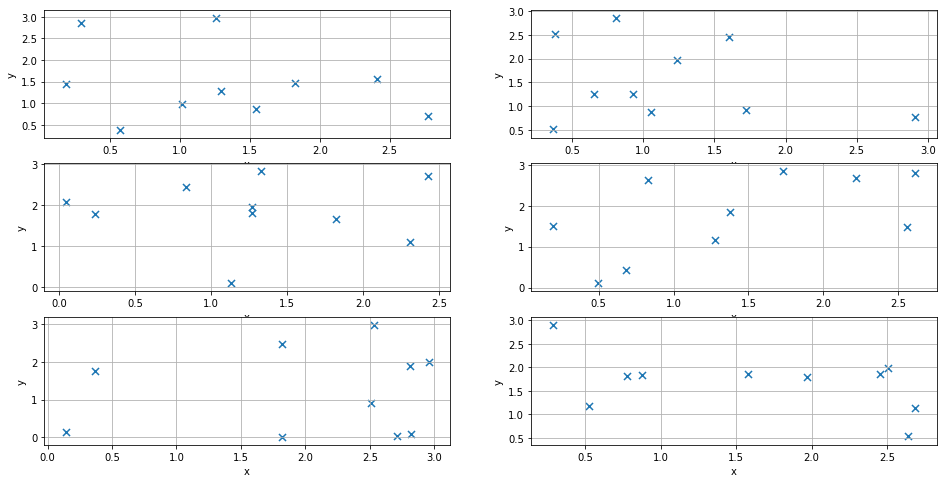

In [10]:
# subplots(n_rows, n_cols) creates a figure with subplots
fig, axes = plt.subplots(3, 2)

# axes is a numpy array
# we will discuss numpy later
for _, ax in np.ndenumerate(axes):
    random_x = [random.uniform(0, 3) for _ in range(10)]
    random_y = [random.uniform(0, 3) for _ in range(10)]
    ax.scatter(
        random_x,
        random_y,
        marker='x',
        s=50
    )
    ax.set(
        xlabel='x',
        ylabel='y',
    )
    ax.grid()
fig.set_size_inches(w=16, h=8)

Let's generate some random points and plot them

In [12]:
def random_x_y(points):
    b0 = random.uniform(-1, 1)
    b1 = random.uniform(1, 3)
    x = [random.uniform(0, 3) for _ in range(points)]
    # to every yi, add some error between (-1, 1)
    y = [
        b0 + b1*xi + random.uniform(-1, 1)
        for xi in x
    ]
    # Using linear regression, our goal is to find
    # b0 and b1. We return also the used b0 and b1,
    # so that we can later compare it to our estimations
    return x, y, b0, b1

In [13]:
x, y, b0, b1 = random_x_y(20)

# We also would like to plot the exact
# linear relationship
x_ideal = [0.1 * i for i in range(30)]
y_ideal = [
    b0 + b1*xi
    for xi in x_ideal
]

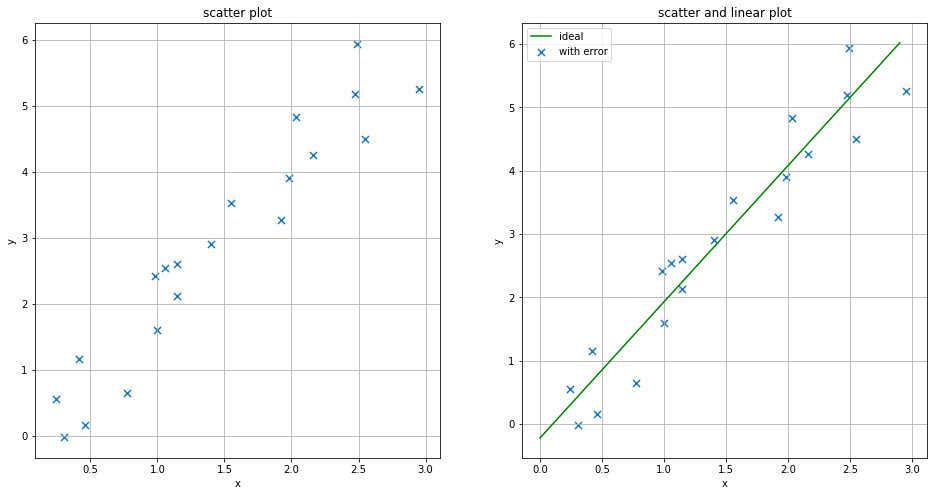

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(
    x, 
    y,
    marker='x',
    s=50
)
ax1.set(
    xlabel='x',
    ylabel='y',
    title='scatter plot',
    
)
ax1.grid()

ax2.scatter(
    x,
    y,
    marker='x',
    s=50,
    label='with error'
)
ax2.plot(
    x_ideal, 
    y_ideal, 
    'g',
    label='ideal'
)
ax2.set(
    xlabel='x',
    ylabel='y',
    title='scatter and linear plot'
)
ax2.grid()
ax2.legend()

fig.set_size_inches(w=16, h=8)

## Error function
We are going to predict $b_0$ and $b_1$. In order to know how good are our estimates,
we need an error function which tells us how big is our error. Let $m$ be the number
of sample points, $h(x^{i})$ the current estimate and $x^{(i)}, y^{(i)}$ a point from our sample.
$$J = \frac{1}{2m}\sum_{i=0}^{m} \left(h(x^{(i)}) - y^{(i)}\right)^2$$

$$h(x^{(i)}) = b_0 + b_1\,x^{(i)}$$

In [15]:
# b0 and b1 are our estimates
def compute_error(x, y, b0, b1):
    def h(xi):
        return b0 + b1*xi
    
    m = len(x)
    return 1/(2*m) * sum(
        (h(x[i]) - y[i]) ** 2
        for i in range(m)
    )